<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2022-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para Ecuaciones Diferenciales Ordinarias<br> </h2>
<hr style="border:3px solid #E3AE00 "> </hr>

# Sistemas Hamiltonianos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
def Euler_explicito(f, y0, N, XM, x0=0):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    for n in range(1,N+1):
        yn += h*f(xn,yn)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def Euler_explicito_multivariate(f, y0, N, XM, x0=0, h = None):
    if h is None:
        h = (XM- x0)/N
    yn = y0.copy()
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0

    #for n in range(1,N+1):
    n = 1
    while n<N+1 and xn<XM:
        yn = yn + h * f(xn,yn)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
        n+=1
    return y, x

### Ejemplo; oscilador armonico
\begin{equation}
\ddot{y} + a(y) = 0, 
\quad
\begin{cases}
\dot{q} = p &= H_{p}\\
\dot{p} = -a(q) &= -H_{q}
\end{cases},\quad
H(p,q) = \frac{1}{2}p^{2} - \int_{0}^{q}a(x) dx
\end{equation}

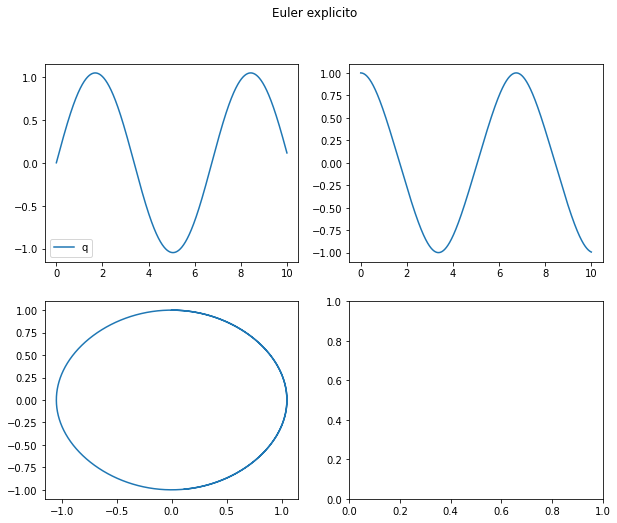

In [28]:
#a = lambda x: x
a = lambda x: np.sin(x)
#a = lambda x: x*np.sin(x)
F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]

Y0 = np.array([.0,1.0], dtype=np.float64)
XM = 10.0
h = [0.0001]
N = [int(XM/hi) for hi in h]

Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
q = np.asarray(Y)[:,0]
p = np.asarray(Y)[:,1]

fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Euler explicito')
ax[0,0].plot(x,q, label='q')
ax[0,1].plot(x,p, label='p')
ax[0,0].legend()

ax[1,0].plot(q,p)
plt.show()

In [70]:
# Phase planes harmonic oscillator:
def phase_planes_harmonic_oscillator(a, axis = [-3,3,-3,3], XM = 20, h = 0.0001):
    F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]
    
    fig, ax = plt.subplots(1,1, figsize=(10,8))

    xlist = np.linspace(axis[0],axis[1],10)
    ylist = np.linspace(axis[2],axis[3], 5)
    Y0list = []
    for x in xlist:
        Y0list.append(np.array([x,0]))
    for y in ylist:
        Y0list.append(np.array([axis[0],y]))
 
    XM = 20.0
    h = [0.0001]
    N = [int(XM/hi) for hi in h]
    for Y0 in Y0list:
        Y, x = Euler_explicito_multivariate(F1, Y0, N[0], XM, x0=0)
        q = np.asarray(Y)[:,0]
        p = np.asarray(Y)[:,1]
        ax.plot(q,p,'C00')
    plt.gca().set_aspect('equal')
    ax.set_xlim([axis[0],axis[1]])
    ax.set_ylim([axis[2],axis[3]])
    plt.show()

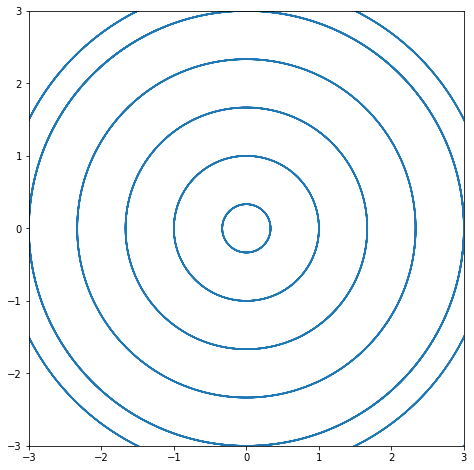

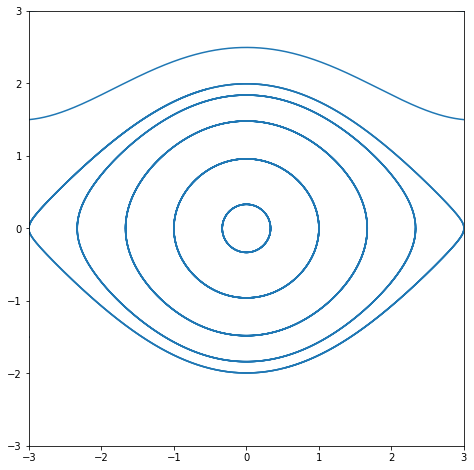

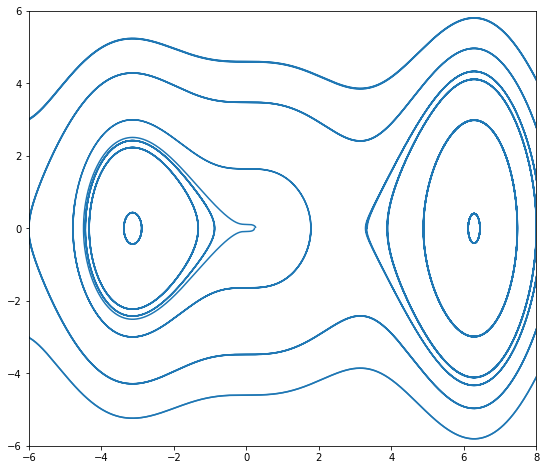

In [72]:
a1 = lambda x: x
a2 = lambda x: np.sin(x)
a3 = lambda x: x*np.sin(x)
phase_planes_harmonic_oscillator(a1)
phase_planes_harmonic_oscillator(a2)
phase_planes_harmonic_oscillator(a3, axis=[-6,8,-6,6])

In [111]:
def plot_blob_story(a, axis = [-2,2,-2,2], XM = 6, h = 0.0001):
    F1 = lambda x, Y: np.array([Y[1], -a(Y[0])]) # q = Y[0], p = Y[1]
    
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    xc = 8.0/5.0
    r = 2.0/5.0
    xlist = np.linspace(xc-r,xc+r,30)
    xlistr = np.linspace(xc+r,xc-r,30)
    Y0list = []
    for x in xlist:
        Y0list.append(np.array([x,np.sqrt(r**2-(x-xc)**2)]))
    for x in xlistr:
        Y0list.append(np.array([x,-np.sqrt(r**2-(x-xc)**2)]))
 
    # plot initial condition
    q0 = np.asarray(Y0list)[:,0]
    p0 = np.asarray(Y0list)[:,1]
    ax.plot(q0,p0)
    
 
    N = int(XM/h)
    XMstages = np.linspace(0,XM,8)
    for xm in XMstages:
        qm = []
        pm = []
        for Y0 in Y0list:
            Y, x = Euler_explicito_multivariate(F1, Y0, N, xm, x0=0,h=h)
            q = np.asarray(Y)[:,0]
            p = np.asarray(Y)[:,1]
            qm.append(q[-1])
            pm.append(p[-1])
        
        ax.plot(qm,pm,'C00')
    plt.gca().set_aspect('equal')
    ax.set_xlim([axis[0],axis[1]])
    ax.set_ylim([axis[2],axis[3]])
    plt.show()

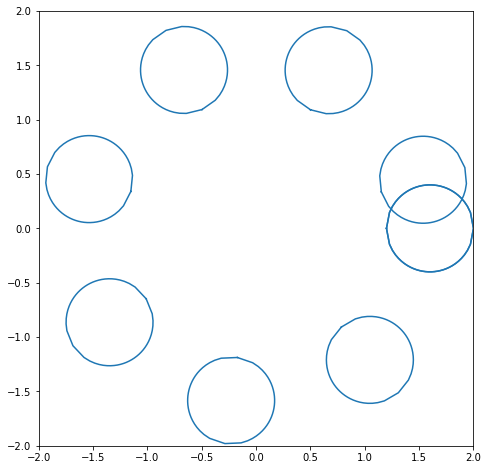

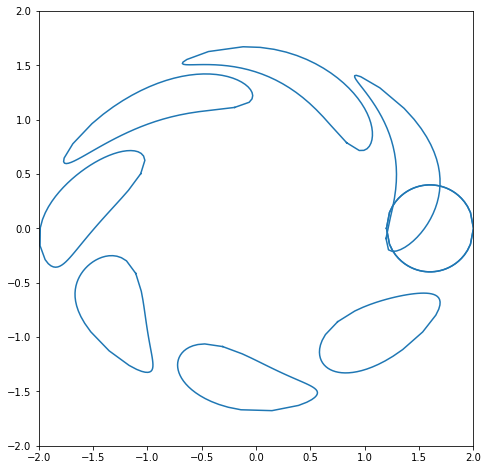

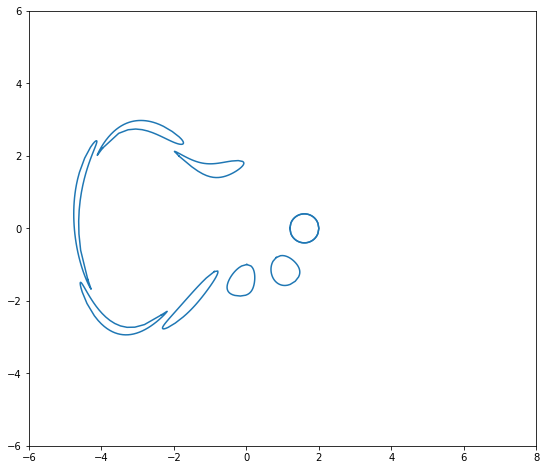

In [114]:
a1 = lambda x: x
a2 = lambda x: np.sin(x)
a3 = lambda x: x*np.sin(x)
plot_blob_story(a1)
plot_blob_story(a2, XM=7)
plot_blob_story(a3, axis=[-6,8,-6,6])

### Example:
\begin{equation}
\ddot{y} + \sin(y) = 0, 
\quad
\begin{cases}
\dot{q} = p &= H_{p}\\
\dot{p} = -\sin(q) &= -H_{q}
\end{cases},\quad
H(p,q) = \frac{1}{2}p^{2} +\cos(q)
\end{equation}

punto medio implicito vs. Runge Kutta 4

In [259]:
def implicitmidpoint_multivariate(f, y0, N, XM, dfdy, x0=0, h=None):
    if h is None:
        h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    if np.isscalar(y0):
        I = 1.0
    else:
        I = np.eye(y0.size)
    for n in range(1,N+1):
        F = lambda y: y - yn - h*(f(xn+h/2.0,(yn+y)/2.0))
        Fprime = lambda y: I - h/2.0*dfdy(xn+h/2.0,(yn+y)/2.0)
        #F = lambda y: np.array([y[0] - yn[0] - h*(yn[1]+y[1])/2.0, y[1] - yn[1] + h*(yn[0]+y[0])/2.0])
        #Fprime = lambda y: I- h/2.0*np.array([[0,1],[-1,0]])
        yn,_ = newton_multivariate(F, X0=yn+h*f(xn,yn), Fprime=Fprime)
        #yn = np.linalg.solve(np.array([[-h/2.0, 1],[1,h/2.0]]) , np.array([[h/2.0, 1],[1,-h/2.0]]).dot(yn))
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def newton_multivariate(F, X0, Fprime, maxiter=10000, tol=1e-14):
    i = 0
    error = 1.0
    X = X0
    
    while np.any(abs(error)>tol) and i <maxiter:
        funeval = F(X)
        Jac = Fprime(X)
        #print(funeval)
        #print(Jac)
        alpha =0.1
        Xnew = X - alpha*np.linalg.solve(Jac, funeval)
    
        error = Xnew-X
        X = Xnew
        i += 1
    return X, F(X)
def RK3(F, y0, N, XM, x0=0): # A = [0,0,0;1/2,0,0;-1,2,0], c = [0,1/2,1], b = [1/6, 2/3, 1/6]
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    for n in range(1,N+1):
  
        K1 = F(xn, yn)
        K2 = F(xn+0.5*h, yn+h*0.5*K1)
        K3 = F(xn+h, yn+h*(-1*K1+2*K2))
        yn = yn+(h)*(1.0/6.0*K1+2.0/3.0*K2+1.0/6.0*K3)
        
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y,x

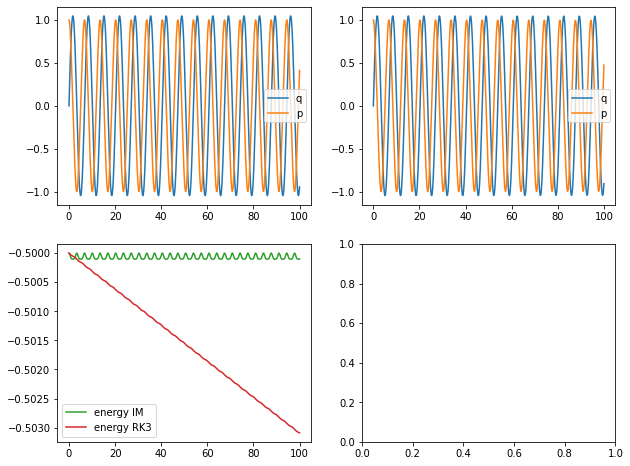

In [285]:
a = lambda x: np.sin(x)
aprime = lambda x: np.cos(x)
#a = lambda x: x
#aprime = lambda x: 1.0
F1 = lambda x, Y: np.array([Y[1], -a(Y[0])], dtype=np.float64) # q = Y[0], p = Y[1]  
dF1dy = lambda x, Y: np.array([[0,1.0],[-aprime(Y[0]),0]], dtype=np.float64)
#F1 = lambda x, Y: np.array([Y[1], -Y[0]]) # q = Y[0], p = Y[1]  
#dF1dy = lambda x, Y: np.array([[0,1.0],[-1.0,0]])

Y0 = np.array([.0,1.0], dtype=np.float64)
XM = 100
h = 0.1
N = int(XM/h)
Y, x = implicitmidpoint_multivariate(F1, Y0, N, XM, dF1dy, x0=0, h=h)
Y3, x3 = RK3(F1, Y0, N, XM)

q = np.asarray(Y)[:,0]
p = np.asarray(Y)[:,1]

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(x,q, label='q')
ax[0,0].plot(x,p, label='p')
q3 = np.asarray(Y3)[:,0]
p3 = np.asarray(Y3)[:,1]
ax[0,1].plot(x3,q3, label='q')
ax[0,1].plot(x3,p3, label='p')
ax[0,0].legend()
ax[0,1].legend()


# energy: 0.5*p^2 - cos(q)
e = []
e3 = []
for i in range(N+1):
    e.append(0.5*p[i]**2-np.cos(q[i]))
    e3.append(0.5*p3[i]**2-np.cos(q3[i]))

ax[1,0].plot(x,e, 'C02',label='energy IM')
ax[1,0].plot(x,e3,'C03', label='energy RK3' )
ax[1,0].legend()
ax[1,0].legend()
pexact = np.cos(x)
qexact = np.sin(x)
#ax[1,1].plot(x, qexact, label='q')
#ax[1,1].plot(x, pexact, label='p')
#ax[1,1].legend()

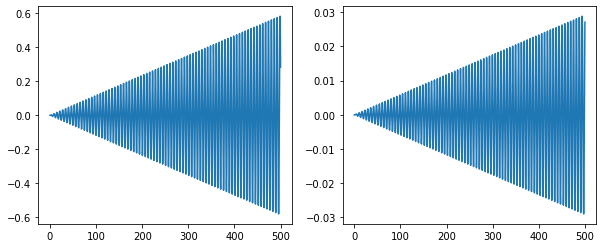

In [283]:
# Error
error = []
error3 = []
eqsum = 0
eq = 0
ep = 0
eq3 = 0
ep3 = 0
for i in range(0,N+1):
    eq = q[i]-qexact[i]
    ep = p[i]-pexact[i]
    error.append(eq+ep)
    eq3 = q3[i]-qexact[i]
    ep3 = p3[i]-pexact[i]
    error3.append(eq3+ep3)
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(x,error)
ax[1].plot(x, error3)